# Predict IV: Cross Validation
This notebook provides a demo of using the PolymerLearn package with PolymerGNN to predict IV values from the dataset

In [1]:
import os
import torch
import pandas as pd
from polymerlearn.utils import get_IV_add, GraphDataset

# Load data from local path:
data = pd.read_csv(os.path.join('../dataset', # May need to change path, depending on location of data 
            'pub_data.csv'))

add = get_IV_add(data)

dataset = GraphDataset(
    data = data,
    structure_dir = '../Structures/AG/xyz',
    Y_target=['IV'],
    test_size = 0.2,
    add_features=add
)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Now we'll instantiate our model, using the standard IV model that gets the best prediction scores.

In [2]:
from polymerlearn.models.gnn import PolymerGNN_IV
from polymerlearn.utils import CV_eval

model_generator_kwargs = {
    'input_feat': 6,         # How many input features on each node; don't change this
    'hidden_channels': 32,   # How many intermediate dimensions to use in model
                             # Can change this ^^
    'num_additional': 4      # How many additional resin properties to include in the prediction
                             # Corresponds to the number in get_IV_add
}

optimizer_gen = torch.optim.AdamW
criterion = torch.nn.MSELoss()

all_predictions, all_y, all_inds = CV_eval(
    dataset = dataset,
    model_generator = PolymerGNN_IV,
    optimizer_generator = optimizer_gen,
    criterion = criterion,
    model_generator_kwargs = model_generator_kwargs,
    optimizer_kwargs = {'lr': 0.0001, 'weight_decay':0.01},
    epochs = 800,
    batch_size = 64,
    verbose = 1,
    use_val = False
)

Fold: 1 	 Epoch: 0,                     	 Train r2: -0.3147 	 Train Loss: 5.0207
Fold: 1 	 Epoch: 50,                     	 Train r2: 0.3266 	 Train Loss: 1.7139
Fold: 1 	 Epoch: 100,                     	 Train r2: 0.5667 	 Train Loss: 1.2771
Fold: 1 	 Epoch: 150,                     	 Train r2: 0.7154 	 Train Loss: 0.6343
Fold: 1 	 Epoch: 200,                     	 Train r2: 0.6501 	 Train Loss: 1.3805
Fold: 1 	 Epoch: 250,                     	 Train r2: 0.8256 	 Train Loss: 0.5513
Fold: 1 	 Epoch: 300,                     	 Train r2: 0.7531 	 Train Loss: 1.1300
Fold: 1 	 Epoch: 350,                     	 Train r2: 0.8754 	 Train Loss: 0.4207
Fold: 1 	 Epoch: 400,                     	 Train r2: 0.7468 	 Train Loss: 0.6733
Fold: 1 	 Epoch: 450,                     	 Train r2: 0.8183 	 Train Loss: 0.5140
Fold: 1 	 Epoch: 500,                     	 Train r2: 0.8933 	 Train Loss: 0.2699
Fold: 1 	 Epoch: 550,                     	 Train r2: 0.8051 	 Train Loss: 0.4479
Fold: 1 	 Epoch: 6

Note that the cross validation, while more stable than a simple train/test split, is relatively unstable, meaning you could get a wide range of scores for any given run.

Now we can plot the model predictions vs. errors:

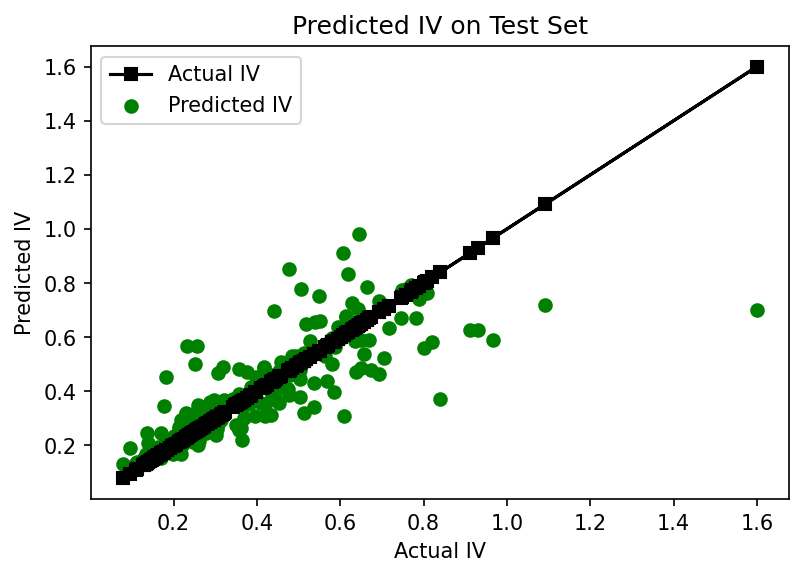

In [3]:
import matplotlib.pyplot as plt

Y = all_y

plt.figure(dpi=150)
plt.plot(Y, Y, marker = 's', c = 'black', label = 'Actual IV')
plt.scatter(Y, all_predictions, c = 'green', label = 'Predicted IV')
plt.xlabel('Actual IV')
plt.ylabel('Predicted IV')
plt.title('Predicted IV on Test Set')
plt.legend()
plt.show()